In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.metrics import auc, roc_curve, accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC

In [105]:
pd.options.display.float_format = '{:.5f}'.format

In [106]:
#Load data

df = pd.read_csv("Data_Assas_2023.csv").drop(columns= "Unnamed: 0")
print("Shape : ", df.shape)
print("Colonnes : ", df.columns)
df.head()

Shape :  (150000, 11)
Colonnes :  Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.76613,45,2,0.80298,9120.00000,13,0,6,0,2.00000
1,0,0.95715,40,0,0.12188,2600.00000,4,0,0,0,1.00000
2,0,0.65818,38,1,0.08511,3042.00000,2,1,0,0,0.00000
3,0,0.23381,30,0,0.03605,3300.00000,5,0,0,0,0.00000
4,0,0.90724,49,1,0.02493,63588.00000,7,0,1,0,0.00000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [107]:
#Look for descriptive statistics :

df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00000,150000.00000,150000.00000,150000.00000,150000.00000,120269.00000,150000.00000,150000.00000,150000.00000,150000.00000,146076.00000
mean,0.06684,6.04844,52.29521,0.42103,353.00508,6670.22124,8.45276,0.26597,1.01824,0.24039,0.75722
std,0.24975,249.75537,14.77187,4.19278,2037.81852,14384.67422,5.14595,4.16930,1.12977,4.15518,1.11509
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.02987,41.00000,0.00000,0.17507,3400.00000,5.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.15418,52.00000,0.00000,0.36651,5400.00000,8.00000,0.00000,1.00000,0.00000,0.00000
75%,0.00000,0.55905,63.00000,0.00000,0.86825,8249.00000,11.00000,0.00000,2.00000,0.00000,1.00000
max,1.00000,50708.00000,109.00000,98.00000,329664.00000,3008750.00000,58.00000,98.00000,54.00000,98.00000,20.00000


# Focus on target variable

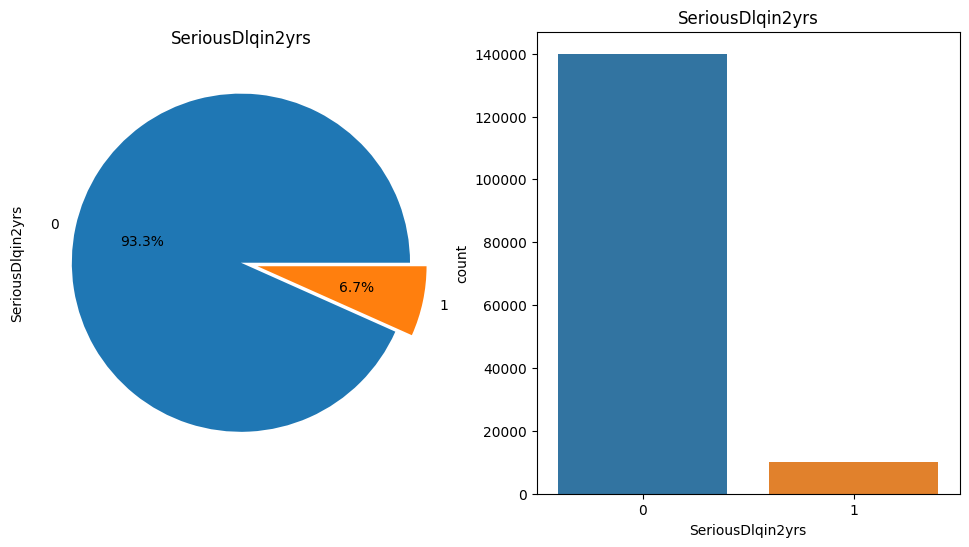

In [138]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('SeriousDlqin2yrs')
#ax[0].set_ylabel('')
sns.countplot(x = df['SeriousDlqin2yrs'])
axes[1].set_title('SeriousDlqin2yrs')
plt.show()

# Detection of Outliers 

In [108]:
def get_Upper_Fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    return Upper_Fence

In [109]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## We investigate late in paiement

In [142]:
df[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate' ]].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,150000.00000,150000.00000,150000.00000
mean,0.42103,0.24039,0.26597
std,4.19278,4.15518,4.16930
min,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000
75%,0.00000,0.00000,0.00000
max,98.00000,98.00000,98.00000


In [151]:
print("values for range 30-59 days : ", df['NumberOfTime30-59DaysPastDueNotWorse'].unique())
print("values for range 60-89 days : ", df['NumberOfTime60-89DaysPastDueNotWorse'].unique())
print("values for range 90 days : ", df['NumberOfTimes90DaysLate'].unique())

values for range 30-59 days :  [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
values for range 60-89 days :  [ 0  1  2  5  3 98  4  6  7  8 96 11  9]
values for range 90 days :  [ 0  1  3  2  5  4 98 10  9  6  7  8 15 96 11 13 14 17 12]


In [162]:
# We notice that we always have the following values : 96 and 98, how many individuals are concerned ?

print(df.loc[df["NumberOfTime30-59DaysPastDueNotWorse"] > 90].shape)
print(df.loc[df["NumberOfTime60-89DaysPastDueNotWorse"] > 90].shape)
print(df.loc[df["NumberOfTimes90DaysLate"] > 90].shape)

(269, 11)
(269, 11)
(269, 11)


2.5


Text(0.5, 1.0, 'Distribution of NumberOfDependents')

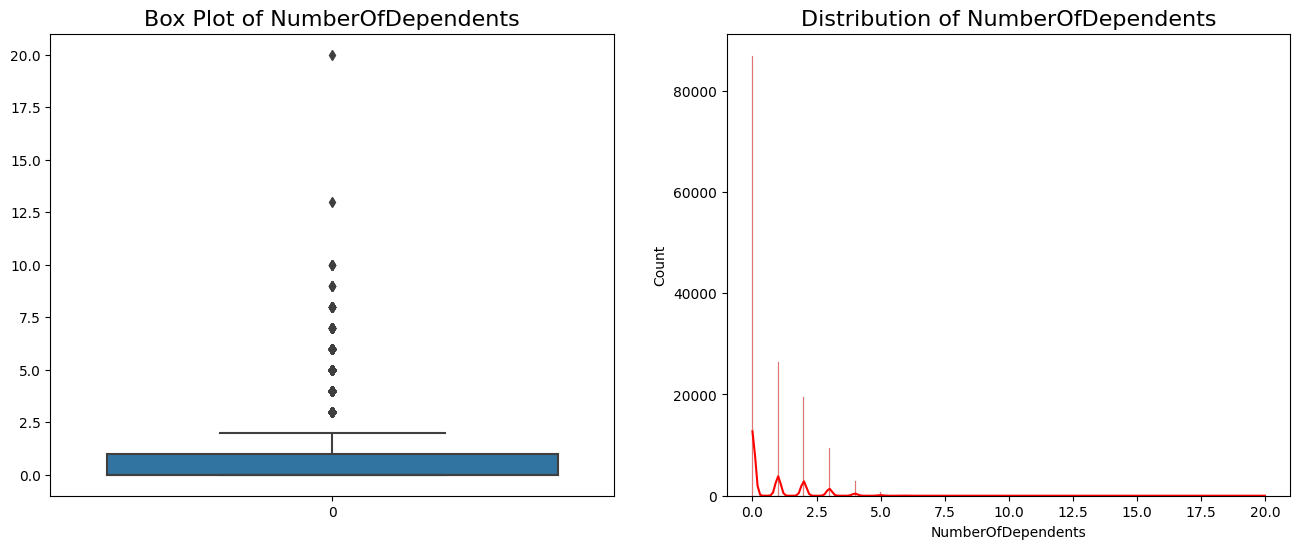

In [ ]:
#Numberof Dependents

treshold_dependent = get_Upper_Fence(df["NumberOfDependents"])
print(treshold_dependent)

fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df['NumberOfDependents'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfDependents', size=16)
sns.histplot(df['NumberOfDependents'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of NumberOfDependents', size=16)

5.0


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

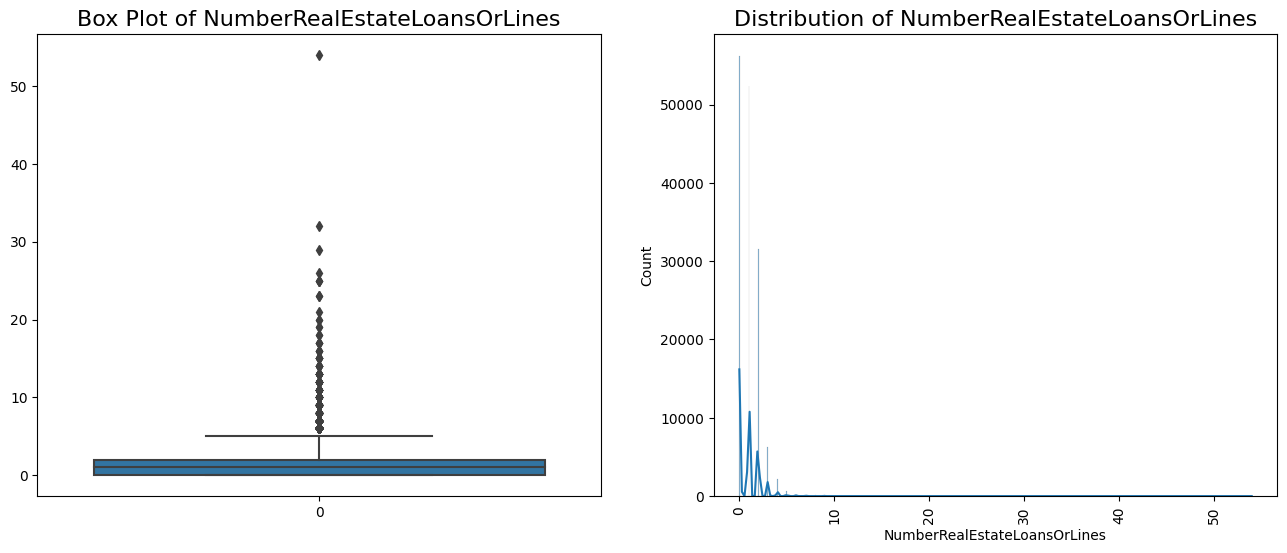

In [ ]:
#NumberRealEstateLoansOrLines

treshold_NumberRealEstateLoansOrLines = get_Upper_Fence(df["NumberRealEstateLoansOrLines"])
print(treshold_NumberRealEstateLoansOrLines)

fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df['NumberRealEstateLoansOrLines'], ax = axes[0])
axes[0].set_title('Box Plot of NumberRealEstateLoansOrLines', size=16)
sns.histplot(df['NumberRealEstateLoansOrLines'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberRealEstateLoansOrLines', size=16)
plt.xticks(rotation=90)

15522.5


(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(-500000.0, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0'),
  Text(3500000.0, 0, '3.5')])

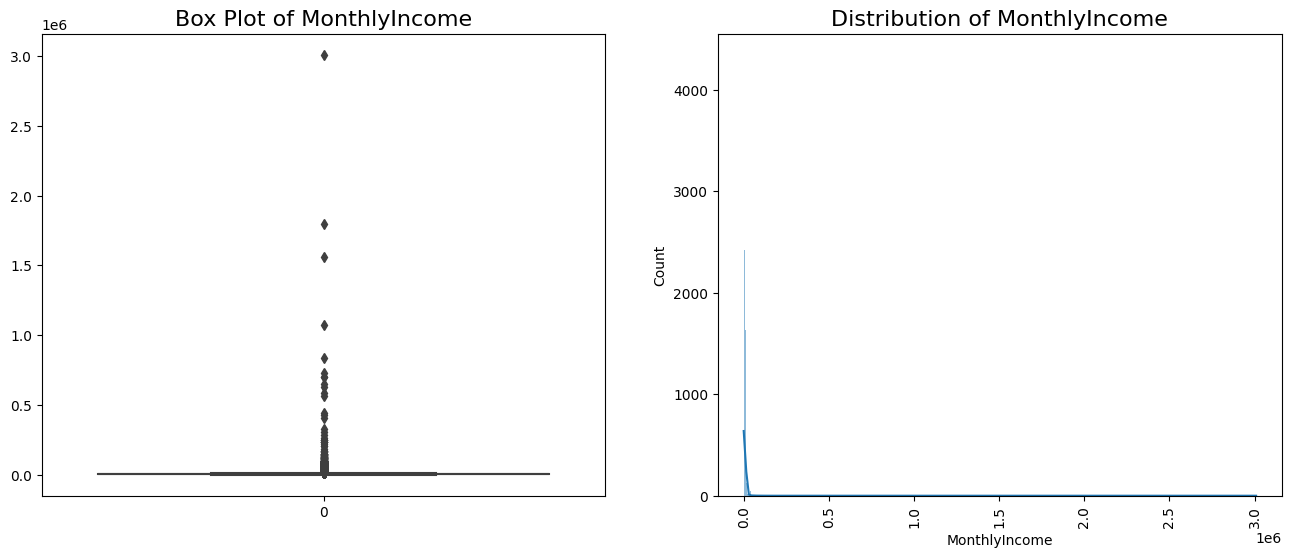

In [ ]:
#MonthlyIncome

treshold_MonthlyIncome = get_Upper_Fence(df["MonthlyIncome"])
print(treshold_MonthlyIncome)

fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df['MonthlyIncome'], ax = axes[0])
axes[0].set_title('Box Plot of MonthlyIncome', size=16)
sns.histplot(df['MonthlyIncome'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of MonthlyIncome', size=16)
plt.xticks(rotation=90)

20.0


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

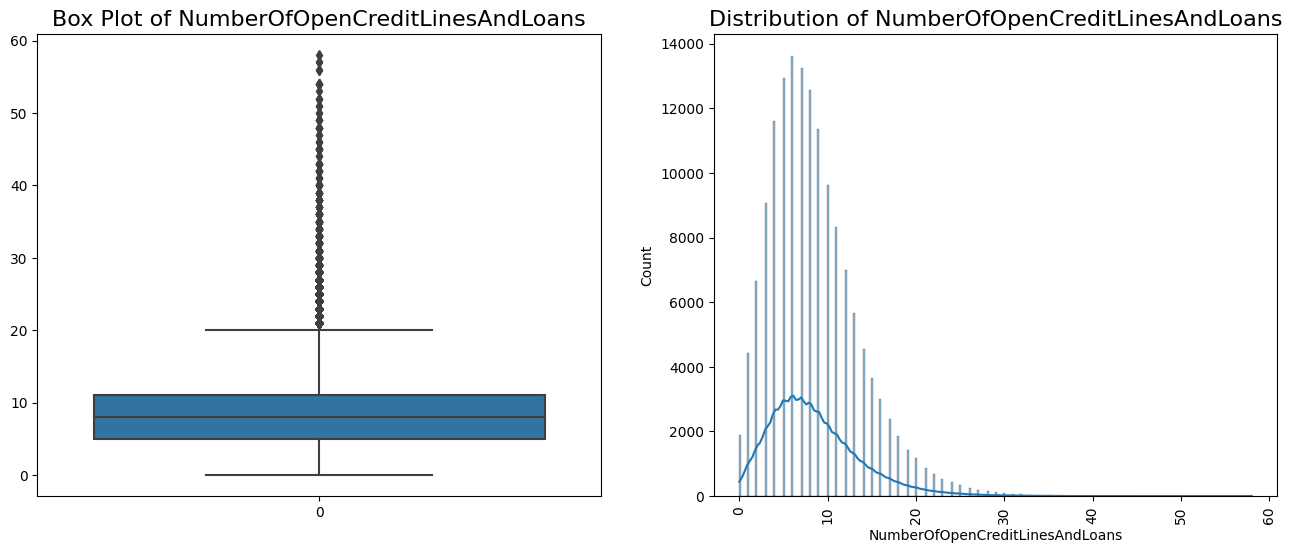

In [ ]:
#NumberOfOpenCreditLinesAndLoans

treshold_creditLines = get_Upper_Fence(df["NumberOfOpenCreditLinesAndLoans"])
print(treshold_creditLines)

fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df['NumberOfOpenCreditLinesAndLoans'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfOpenCreditLinesAndLoans', size=16)
sns.histplot(df['NumberOfOpenCreditLinesAndLoans'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberOfOpenCreditLinesAndLoans', size=16)
plt.xticks(rotation=90)

20.0

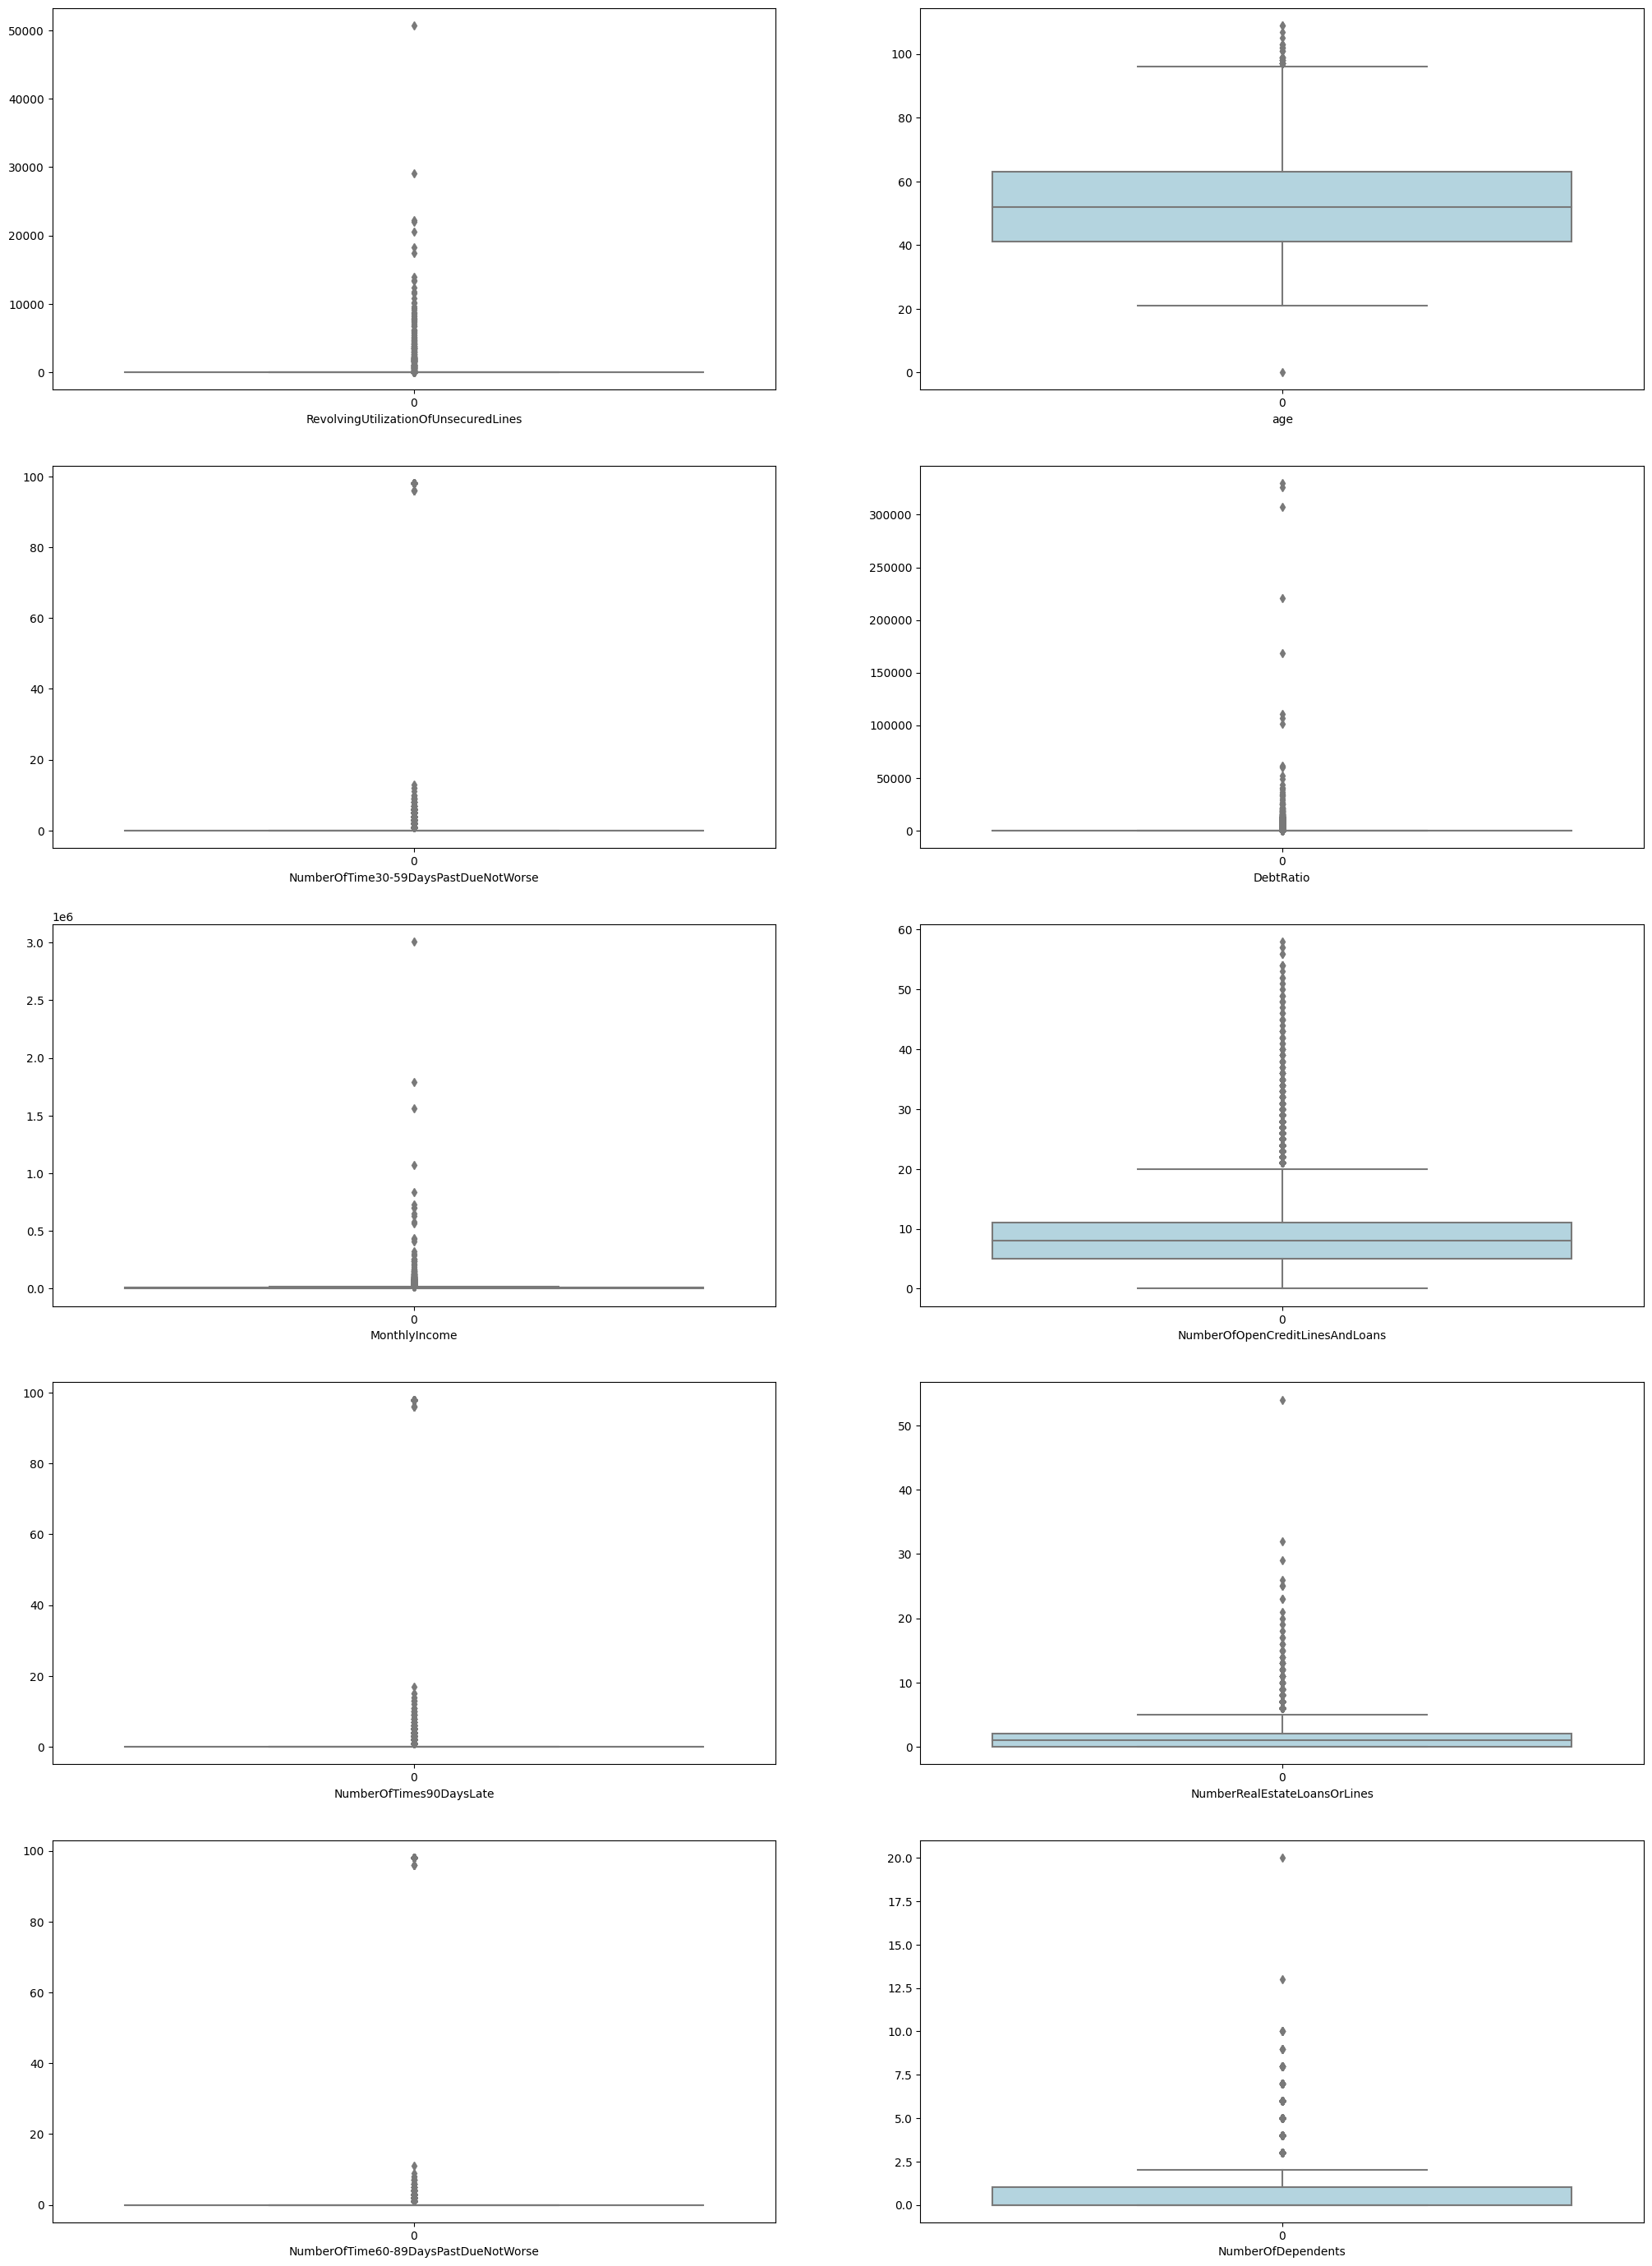

In [ ]:
#It seems that we have outliers, we will thus plot box plot for each columns
fig, ax = plt.subplots(5, 2,figsize=(25, 35))
i = 1

for col in df.drop(columns="SeriousDlqin2yrs").columns:
    plt.subplot(5, 2, i)
    sns.boxplot(df[col], color= "lightblue")
    plt.xlabel(col)
    i+=1


In [ ]:
#Check for Missing values :

df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
# We look for individual's features for NA

ind_na = df[df["MonthlyIncome"].isna()]
print(ind_na.shape)
ind_na.describe()

(29731, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29731.00000,29731.00000,29731.00000,29731.00000,29731.00000,0.00000,29731.00000,29731.00000,29731.00000,29731.00000,25807.00000
mean,0.05614,6.64942,56.36235,0.57987,1673.39656,NaN,7.21607,0.48461,0.87148,0.45300,0.31631
std,0.23019,217.81485,15.43879,6.25536,4248.37289,NaN,4.84272,6.25041,1.03429,6.24208,0.80994
min,0.00000,0.00000,21.00000,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.01603,46.00000,0.00000,123.00000,NaN,4.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.08170,57.00000,0.00000,1159.00000,NaN,6.00000,0.00000,1.00000,0.00000,0.00000
75%,0.00000,0.44055,67.00000,0.00000,2382.00000,NaN,10.00000,0.00000,1.00000,0.00000,0.00000
max,1.00000,22198.00000,109.00000,98.00000,329664.00000,NaN,45.00000,98.00000,23.00000,98.00000,9.00000


In [ ]:
#We notice that we habe the same number of missing values for NumberOfDependents
ind_na.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

<Axes: xlabel='DebtRatio'>

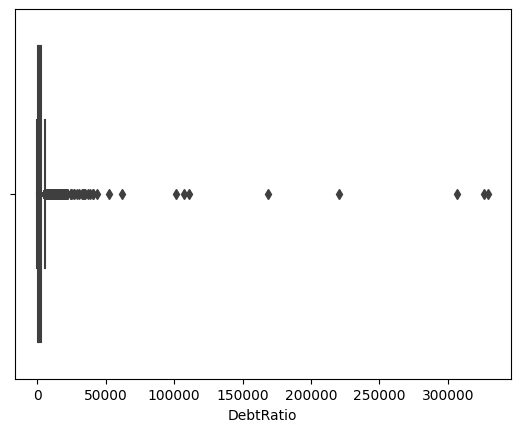

In [ ]:
# Draw boxplot for each columns

sns.boxplot(data = ind_na, x = "DebtRatio")

In [ ]:
# We notice that a lot of indiviuals for who the income is not specified have a debtratio higher than 100%

outliers = ind_na[ind_na["DebtRatio"] > 100]
print(outliers.shape)
print(outliers["SeriousDlqin2yrs"].value_counts(normalize= True))
print(outliers.describe())
outliers.isna().sum()

(22693, 11)
0   0.94091
1   0.05909
Name: SeriousDlqin2yrs, dtype: float64
       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines         age  \
count       22693.00000                           22693.00000 22693.00000   
mean            0.05909                               8.19810    54.59424   
std             0.23580                             247.96795    13.59046   
min             0.00000                               0.00000    21.00000   
25%             0.00000                               0.02514    45.00000   
50%             0.00000                               0.11467    55.00000   
75%             0.00000                               0.47008    64.00000   
max             1.00000                           22198.00000   109.00000   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
count                           22693.00000  22693.00000        0.00000   
mean                                0.23249   2184.27374            NaN   
std   

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           22693
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2319
dtype: int64

# Clean DataFrame

In [ ]:
# Clean Datafram of outliers for splitting

df_clean = df.copy()

print("Dimension : ", df_clean.shape)
df_clean.describe()

Dimension :  (150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00000,150000.00000,150000.00000,150000.00000,150000.00000,120269.00000,150000.00000,150000.00000,150000.00000,150000.00000,146076.00000
mean,0.06684,6.04844,52.29521,0.42103,353.00508,6670.22124,8.45276,0.26597,1.01824,0.24039,0.75722
std,0.24975,249.75537,14.77187,4.19278,2037.81852,14384.67422,5.14595,4.16930,1.12977,4.15518,1.11509
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.02987,41.00000,0.00000,0.17507,3400.00000,5.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.15418,52.00000,0.00000,0.36651,5400.00000,8.00000,0.00000,1.00000,0.00000,0.00000
75%,0.00000,0.55905,63.00000,0.00000,0.86825,8249.00000,11.00000,0.00000,2.00000,0.00000,1.00000
max,1.00000,50708.00000,109.00000,98.00000,329664.00000,3008750.00000,58.00000,98.00000,54.00000,98.00000,20.00000


In [ ]:
df_clean.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [119]:
X = df_clean.drop("SeriousDlqin2yrs", axis = 1)
y = df_clean[["SeriousDlqin2yrs"]]
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.76613,45,2,0.80298,9120.00000,13,0,6,0,2.00000
1,0.95715,40,0,0.12188,2600.00000,4,0,0,0,1.00000
2,0.65818,38,1,0.08511,3042.00000,2,1,0,0,0.00000
3,0.23381,30,0,0.03605,3300.00000,5,0,0,0,0.00000
4,0.90724,49,1,0.02493,63588.00000,7,0,1,0,0.00000
...,...,...,...,...,...,...,...,...,...,...
149995,0.04067,74,0,0.22513,2100.00000,4,0,1,0,0.00000
149996,0.29975,44,0,0.71656,5584.00000,4,0,1,0,2.00000
149997,0.24604,58,0,3870.00000,NaN,18,0,1,0,0.00000
149998,0.00000,30,0,0.00000,5716.00000,4,0,0,0,0.00000


# Handling Missing Values

In [85]:
from sklearn.impute import SimpleImputer, KNNImputer

In [120]:
imputer = SimpleImputer(missing_values= np.nan, strategy= 'median')
X = imputer.fit_transform(X)
np.isnan(X).any()

False

In [ ]:
# We could also impute NA based on KNN algorithm

#imputer = KNNImputer(n_neighbors = 3)
#X = imputer.fit_transform(X)
#np.isnan(X).any()

# Data Normalization

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[1.51085945e-05, 4.12844037e-01, 2.04081633e-02, ...,
        1.11111111e-01, 0.00000000e+00, 1.00000000e-01],
       [1.88757399e-05, 3.66972477e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-02],
       [1.29798087e-05, 3.48623853e-01, 1.02040816e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.85217161e-06, 5.32110092e-01, 0.00000000e+00, ...,
        1.85185185e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.75229358e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.67682210e-05, 5.87155963e-01, 0.00000000e+00, ...,
        3.70370370e-02, 0.00000000e+00, 0.00000000e+00]])

# Split dataset

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [127]:
print("X_train dimension : ", X_train.shape)
print("y_train dimension : ", y_train.shape)
print("X_test dimension : ", X_test.shape)
print("y_test dimension : ", y_test.shape)

X_train dimension :  (120000, 10)
y_train dimension :  (120000, 1)
X_test dimension :  (30000, 10)
y_test dimension :  (30000, 1)


# Logistic Regression 

/Users/alexisrevelle/miniconda3/envs/credit_risque/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score :  0.9348666666666666
F1 Score :  0.027860696517412933
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.01      0.03      1956

    accuracy                           0.93     30000
   macro avg       0.73      0.51      0.50     30000
weighted avg       0.91      0.93      0.91     30000



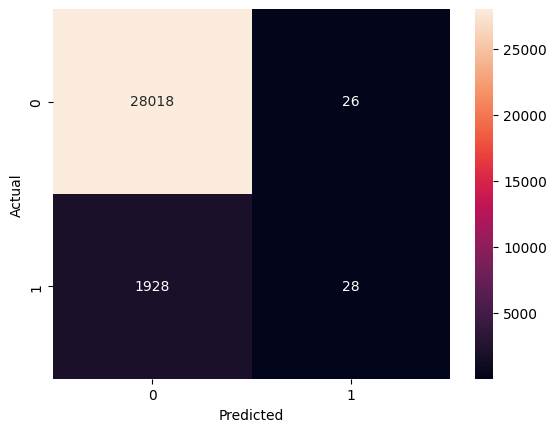

In [128]:
log = LogisticRegression(max_iter=3000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

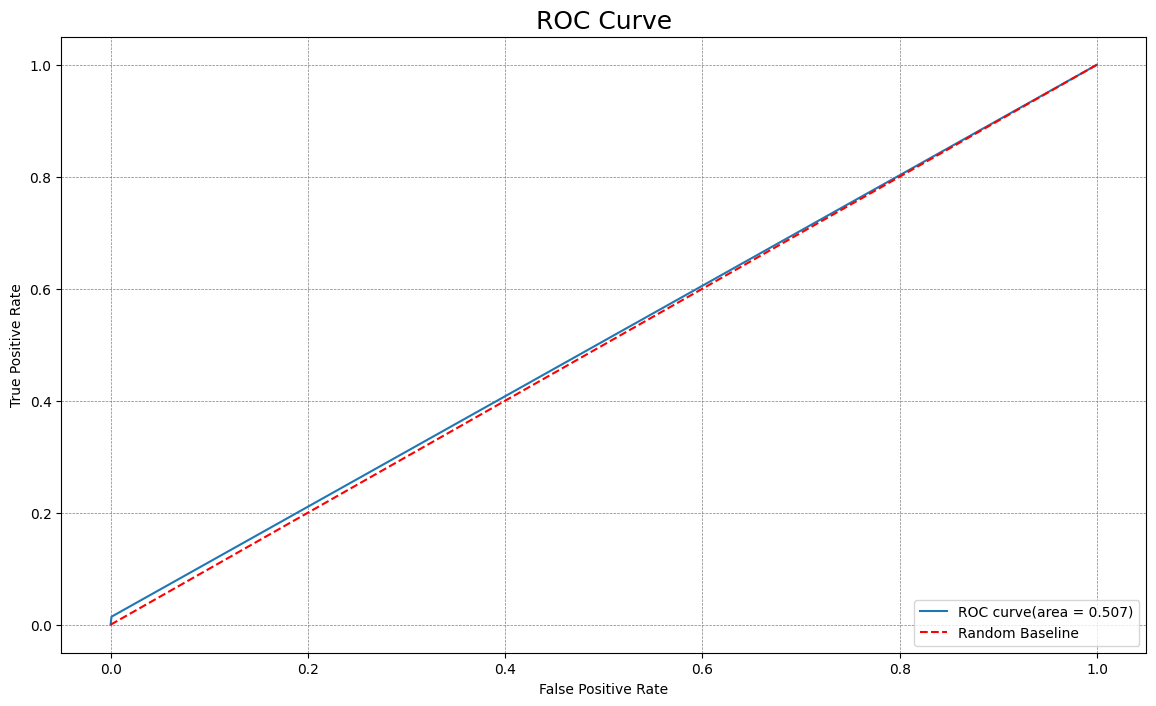

In [129]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
score = auc(fpr, tpr)
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

# Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier

Accuracy Score :  0.8951666666666667
F1 Score :  0.2542091534266066
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     28044
           1       0.24      0.27      0.25      1956

    accuracy                           0.90     30000
   macro avg       0.59      0.61      0.60     30000
weighted avg       0.90      0.90      0.90     30000



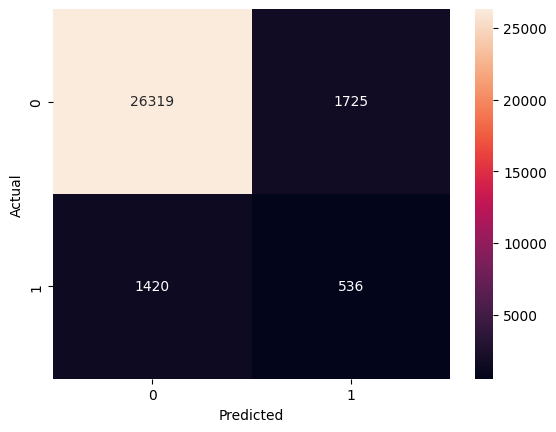

In [131]:
Tree_clf = DecisionTreeClassifier(random_state= 42)
Tree_clf.fit(X_train, y_train)

y_pred = Tree_clf.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

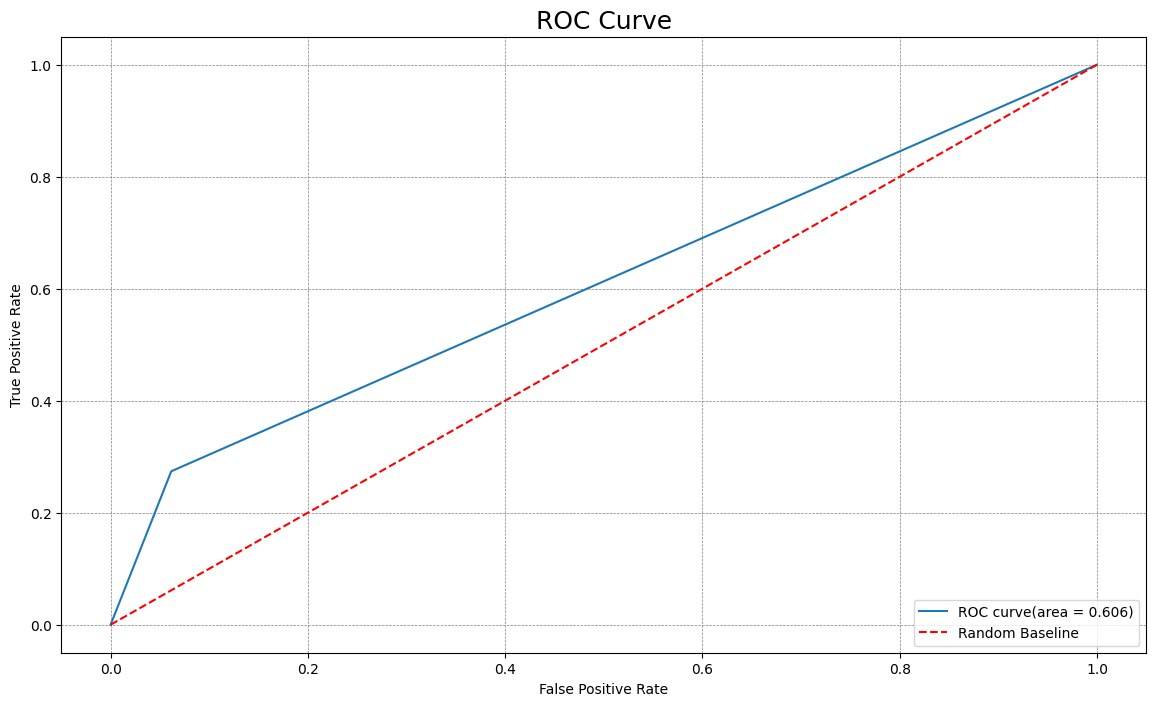

In [132]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
score = auc(fpr, tpr)
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

# XGBOOST

Accuracy Score :  0.9367333333333333
F1 Score :  0.2949479940564636
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.54      0.20      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.74      0.60      0.63     30000
weighted avg       0.92      0.94      0.92     30000



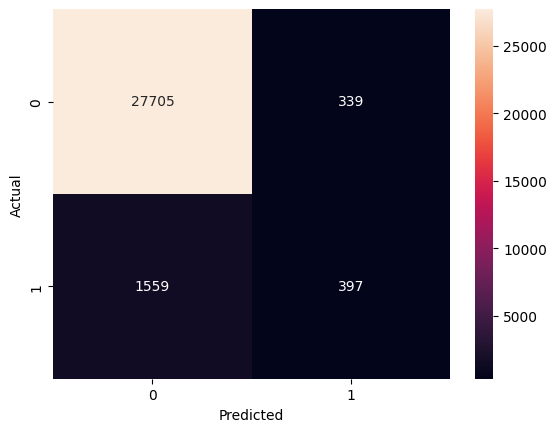

In [133]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

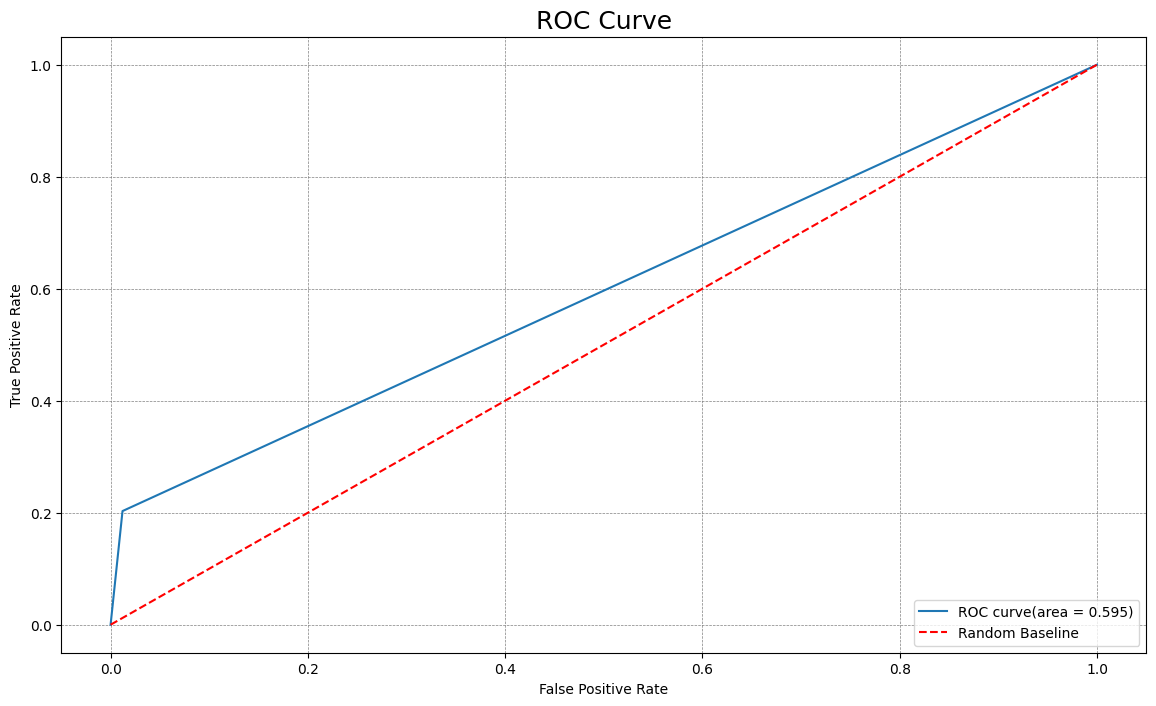

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
score = auc(fpr, tpr)
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")